# Analysis

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [14]:
from src.wandb_utils import get_full_csv
import matplotlib.pyplot as plt

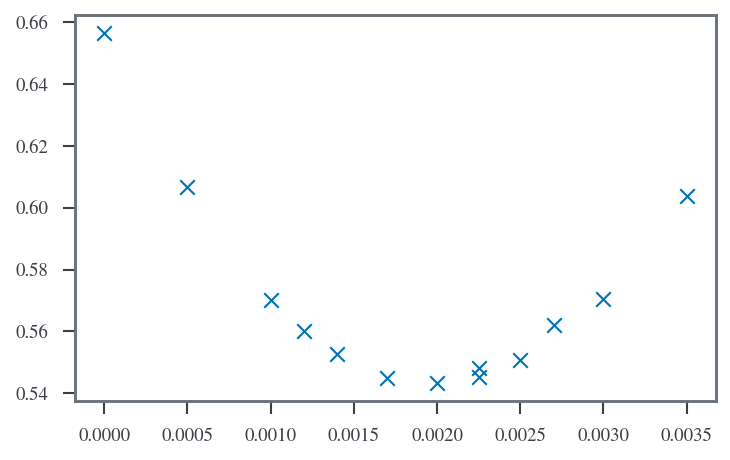

In [16]:
plt.scatter(
    [eval(get_full_csv()["coup"][i])["c_d"] for i in range(13)],
    get_full_csv()["trend_nino1+2"][:13],
)

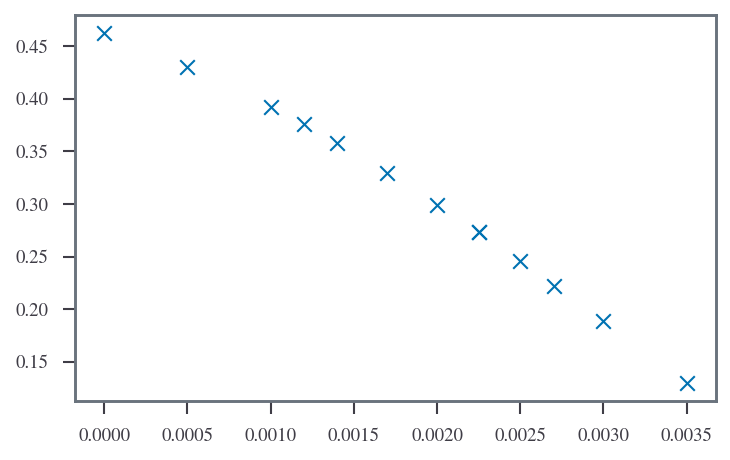

In [17]:
plt.scatter(
    [eval(get_full_csv()["coup"][i])["c_d"] for i in range(13)],
    get_full_csv()["trend_nino3.4"][:13],
)

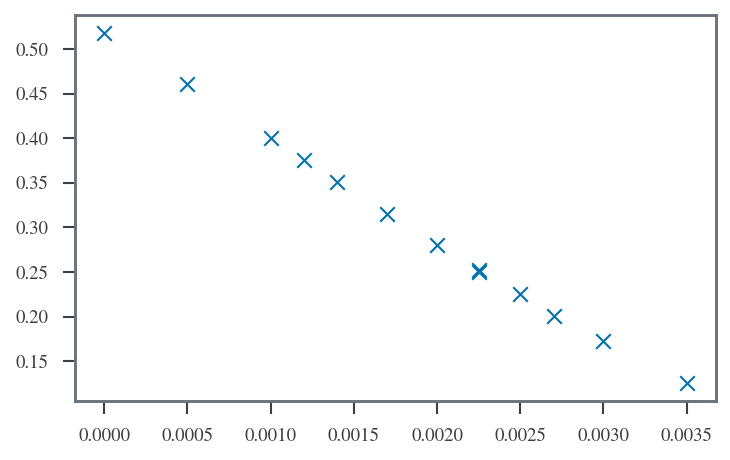

In [18]:
plt.scatter(
    [eval(get_full_csv()["coup"][i])["c_d"] for i in range(13)],
    get_full_csv()["trend_nino3"][:13],
)

In [19]:
get_full_csv()._step

0     6
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     4
10    4
11    4
12    4
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
Name: _step, dtype: int64

In [10]:
get_full_csv()["trend_nino1+2"][:13]

0     0.606834
1     0.656716
2     0.603659
3     0.545379
4     0.550769
5     0.570430
6     0.570144
7     0.543201
8     0.545005
9     0.560243
10    0.561919
11    0.548096
12    0.552706
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
Name: trend_nino1+2, dtype: float64

In [25]:
import wandb
api = wandb.Api()
# Project is specified by <entity/project-name>

runs = api.runs("sdat2/seager19")


In [41]:
import math

metric_dict = {}

for rn in [x for x in runs][0:13]:
    print(rn)
    config = {k: v for k, v in rn.config.items() if not k.startswith("_")}
    pair_list = []
    for i, row in rn.history().iterrows():
        step = row["_step"]
        metric = row["mean_pac"]
        if not math.isnan(metric):
            # print(step, metric, type(metric))
            pair_list.append([step, metric])

    metric_dict[eval(config["coup"])["c_d"]] = np.array(pair_list)

<Run sdat2/seager19/28w09p06 (finished)>
<Run sdat2/seager19/3187qitr (failed)>
<Run sdat2/seager19/2ts6f2rp (failed)>
<Run sdat2/seager19/vf5mt15q (finished)>
<Run sdat2/seager19/suszf2cj (finished)>
<Run sdat2/seager19/3jcljvx5 (finished)>
<Run sdat2/seager19/176yerzi (finished)>
<Run sdat2/seager19/184vohdn (finished)>
<Run sdat2/seager19/1levxkju (finished)>
<Run sdat2/seager19/3a4idlie (finished)>
<Run sdat2/seager19/1vre85tn (finished)>
<Run sdat2/seager19/3ke8yisi (finished)>
<Run sdat2/seager19/2um7xc7h (finished)>


In [40]:
config["coup"]

"{'c_d': 0.0014, 'rho_air': 1.225, 'iterations': 5}"

Text(0, 0.5, 'Mean Tropical Pacific (pac) ($^{\\circ}$C)')

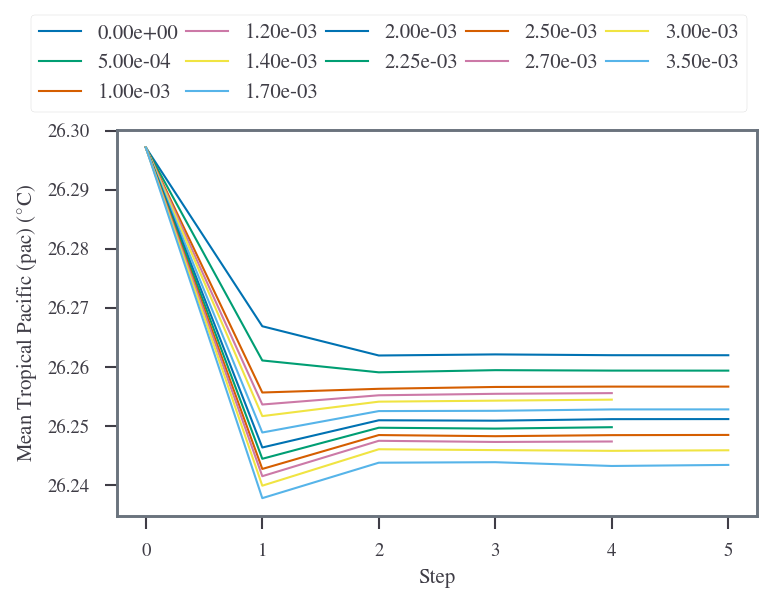

In [58]:
for cd in sorted(metric_dict):
    plt.plot(metric_dict[cd][:, 0], metric_dict[cd][:, 1], label="{:.2e}".format(cd))
    
plt.legend(bbox_to_anchor=(-0.15, 1.02, 1.15, 0.102),
            loc="lower left",
            mode="expand",
           ncol=5,
        )
plt.xlabel("Step")
plt.ylabel("Mean Tropical Pacific (pac) ($^{\circ}$C)")

In [110]:
def metric_conv_plot(
    metric_name: str = "mean_pac", long_name: str = "Mean Tropical Pacific (pac)"
) -> dict:
    metric_dict = {}

    for rn in [x for x in runs][0:13]:
        print(rn)
        config = {k: v for k, v in rn.config.items() if not k.startswith("_")}
        pair_list = []
        for i, row in rn.history().iterrows():
            step = row["_step"]
            metric = row[metric_name]
            if not math.isnan(metric):
                # print(step, metric, type(metric))
                pair_list.append([step, metric])
        
        # enforce needing 6 iterations.
        if len(pair_list) == 6:
            metric_dict[eval(config["coup"])["c_d"]] = np.array(pair_list)

    for cd in sorted(metric_dict):
        plt.plot(
            metric_dict[cd][:, 0], metric_dict[cd][:, 1], label="{:.2e}".format(cd)
        )

    plt.legend(
        bbox_to_anchor=(-0.15, 1.02, 1.15, 0.102),
        loc="lower left",
        mode="expand",
        ncol=5,
    )
    plt.xlabel("Step")
    plt.ylabel(long_name + r" [$^{\circ}$C]")
    plt.show()
    
    
    for cd in metric_dict:
        plt.plot(np.abs((metric_dict[cd][:, 1] -  metric_dict[cd][5, 1]) / metric_dict[cd][5, 1]), label="{:.2e}".format(cd))
    plt.ylabel(long_name + r" $ \frac{|C-F|}{F}$")
    plt.yscale("log")
    plt.xlabel("Step")
    plt.legend(
        bbox_to_anchor=(-0.15, 1.02, 1.15, 0.102),
        loc="lower left",
        mode="expand",
        ncol=5,
    )
    plt.show()

    return metric_dict

<Run sdat2/seager19/28w09p06 (finished)>
<Run sdat2/seager19/3187qitr (failed)>
<Run sdat2/seager19/2ts6f2rp (failed)>
<Run sdat2/seager19/vf5mt15q (finished)>
<Run sdat2/seager19/suszf2cj (finished)>
<Run sdat2/seager19/3jcljvx5 (finished)>
<Run sdat2/seager19/176yerzi (finished)>
<Run sdat2/seager19/184vohdn (finished)>
<Run sdat2/seager19/1levxkju (finished)>
<Run sdat2/seager19/3a4idlie (finished)>
<Run sdat2/seager19/1vre85tn (finished)>
<Run sdat2/seager19/3ke8yisi (finished)>
<Run sdat2/seager19/2um7xc7h (finished)>


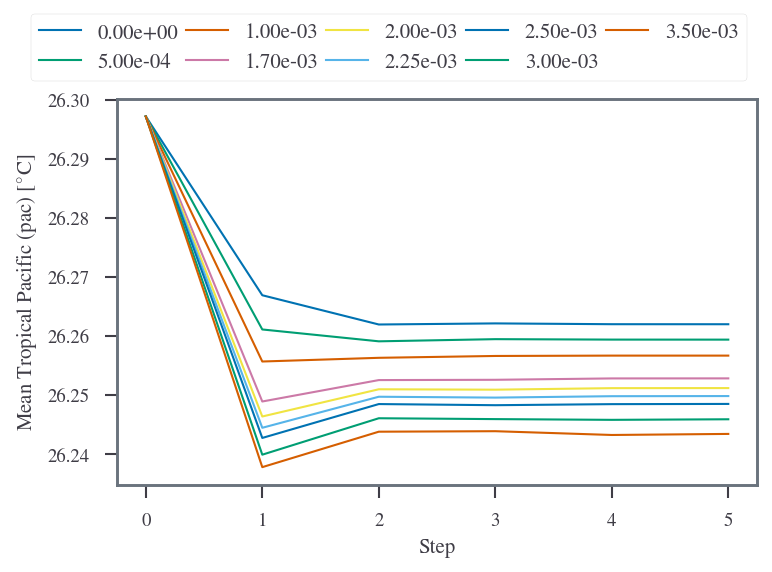

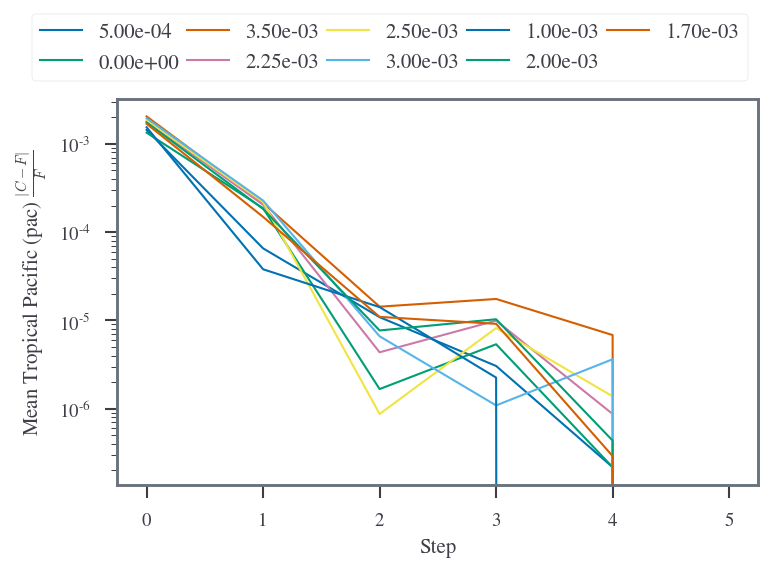

In [111]:
m_dict = metric_conv_plot()

Text(0.5, 0, 'Step')

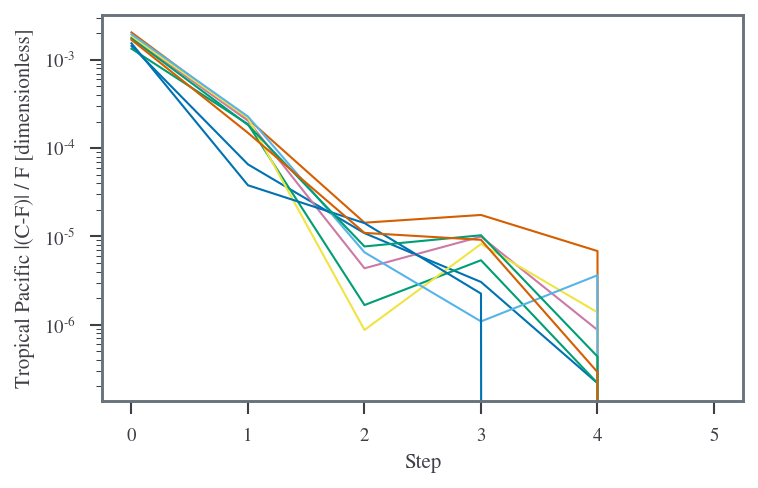

In [106]:
for cd in m_dict:
    plt.plot(np.abs((m_dict[cd][:, 1] -  m_dict[cd][5, 1]) / m_dict[cd][5, 1]))
plt.ylabel("Tropical Pacific |(C-F)| / F [dimensionless]")
plt.yscale("log")
plt.xlabel("Step")

<Run sdat2/seager19/28w09p06 (finished)>
<Run sdat2/seager19/3187qitr (failed)>
<Run sdat2/seager19/2ts6f2rp (failed)>
<Run sdat2/seager19/vf5mt15q (finished)>
<Run sdat2/seager19/suszf2cj (finished)>
<Run sdat2/seager19/3jcljvx5 (finished)>
<Run sdat2/seager19/176yerzi (finished)>
<Run sdat2/seager19/184vohdn (finished)>
<Run sdat2/seager19/1levxkju (finished)>
<Run sdat2/seager19/3a4idlie (finished)>
<Run sdat2/seager19/1vre85tn (finished)>
<Run sdat2/seager19/3ke8yisi (finished)>
<Run sdat2/seager19/2um7xc7h (finished)>


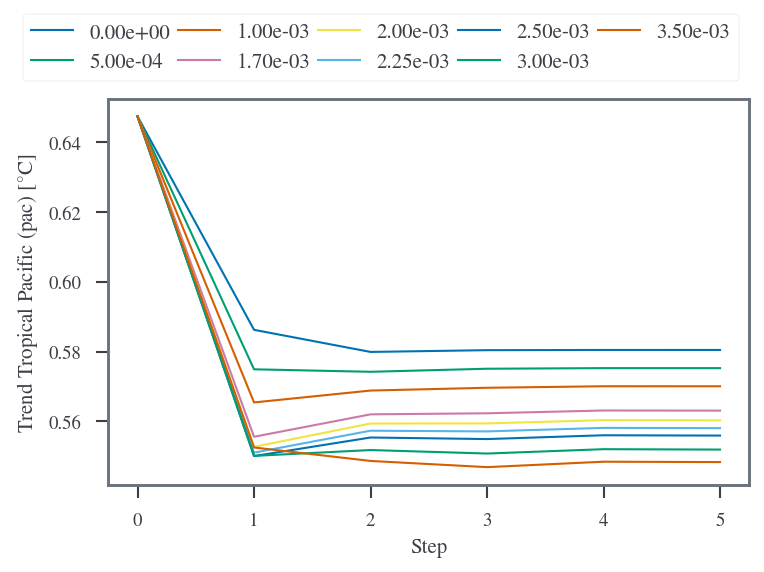

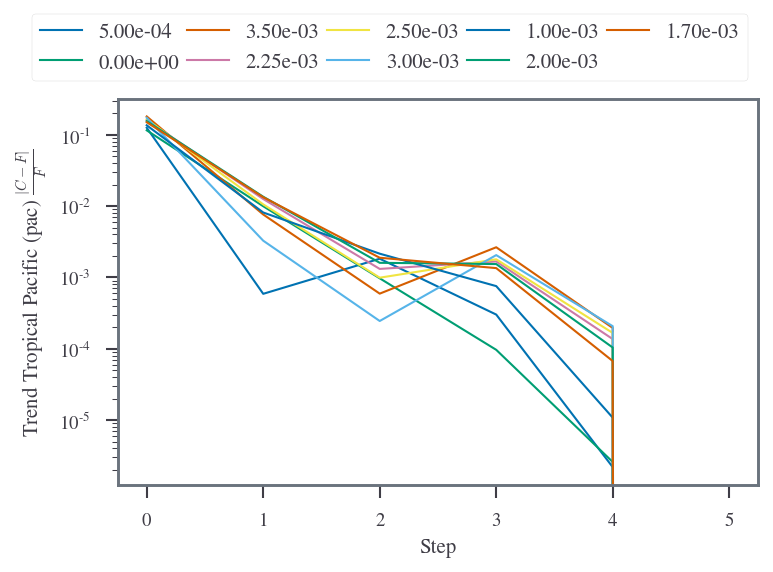

In [112]:
m_dict = metric_conv_plot(metric_name="trend_pac", long_name="Trend Tropical Pacific (pac)")

<Run sdat2/seager19/28w09p06 (finished)>
<Run sdat2/seager19/3187qitr (failed)>
<Run sdat2/seager19/2ts6f2rp (failed)>
<Run sdat2/seager19/vf5mt15q (finished)>
<Run sdat2/seager19/suszf2cj (finished)>
<Run sdat2/seager19/3jcljvx5 (finished)>
<Run sdat2/seager19/176yerzi (finished)>
<Run sdat2/seager19/184vohdn (finished)>
<Run sdat2/seager19/1levxkju (finished)>
<Run sdat2/seager19/3a4idlie (finished)>
<Run sdat2/seager19/1vre85tn (finished)>
<Run sdat2/seager19/3ke8yisi (finished)>
<Run sdat2/seager19/2um7xc7h (finished)>


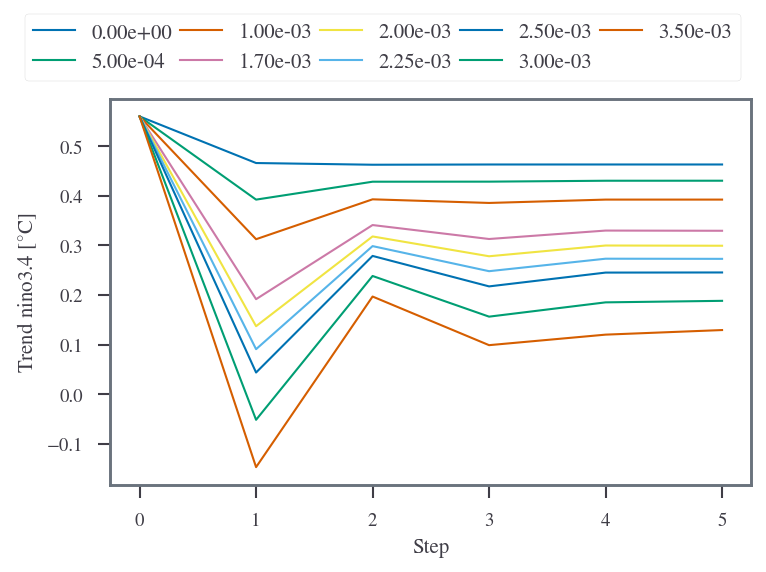

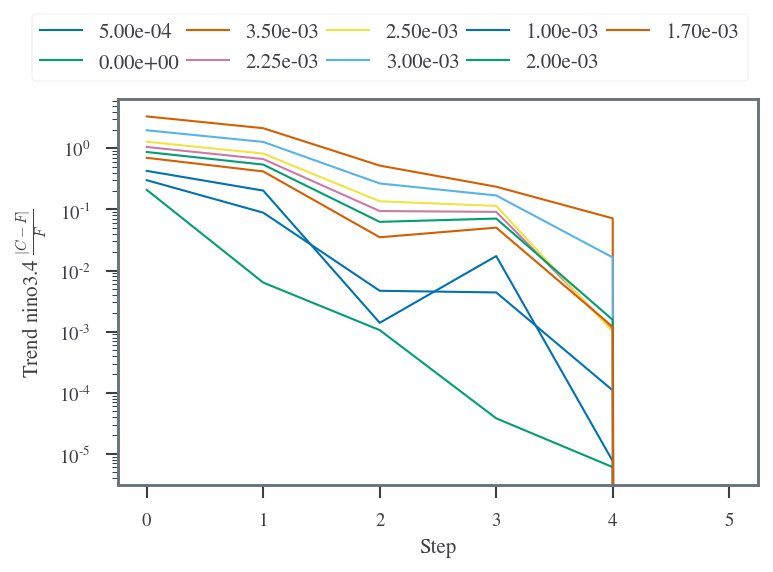

In [114]:
m_dict = metric_conv_plot(metric_name="trend_nino3.4", long_name="Trend nino3.4")

<Run sdat2/seager19/28w09p06 (finished)>
<Run sdat2/seager19/3187qitr (failed)>
<Run sdat2/seager19/2ts6f2rp (failed)>
<Run sdat2/seager19/vf5mt15q (finished)>
<Run sdat2/seager19/suszf2cj (finished)>
<Run sdat2/seager19/3jcljvx5 (finished)>
<Run sdat2/seager19/176yerzi (finished)>
<Run sdat2/seager19/184vohdn (finished)>
<Run sdat2/seager19/1levxkju (finished)>
<Run sdat2/seager19/3a4idlie (finished)>
<Run sdat2/seager19/1vre85tn (finished)>
<Run sdat2/seager19/3ke8yisi (finished)>
<Run sdat2/seager19/2um7xc7h (finished)>


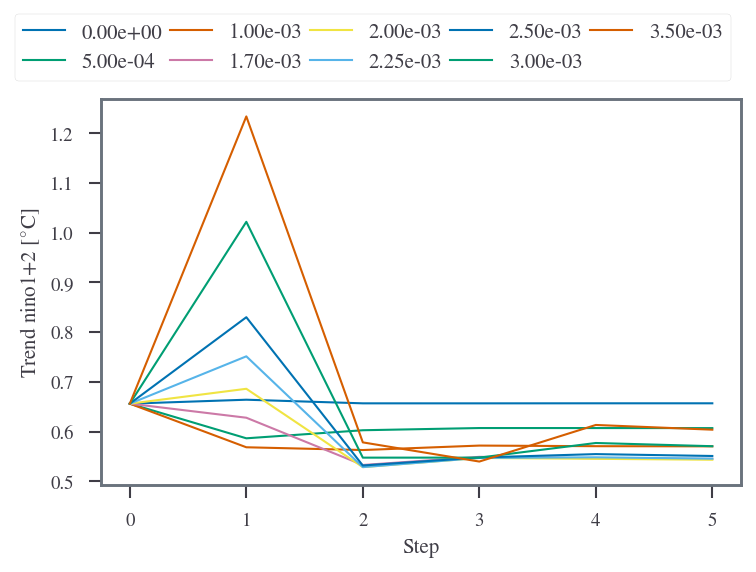

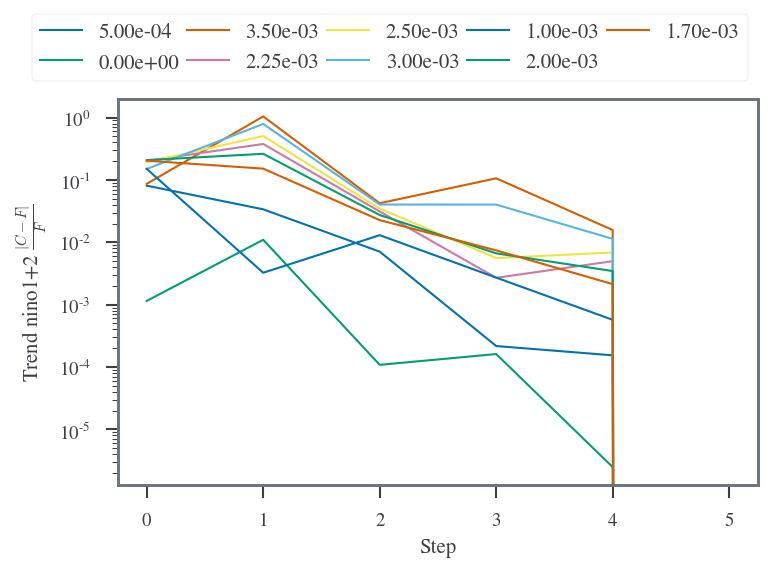

{0.0005: array([[0.        , 0.65596148],
        [1.        , 0.58632352],
        [2.        , 0.60253574],
        [3.        , 0.6069661 ],
        [4.        , 0.60692788],
        [5.        , 0.60683444]]),
 0.0: array([[0.        , 0.65596148],
        [1.        , 0.66392368],
        [2.        , 0.65664458],
        [3.        , 0.65660982],
        [4.        , 0.65671415],
        [5.        , 0.65671578]]),
 0.0035: array([[0.        , 0.65596148],
        [1.        , 1.23361178],
        [2.        , 0.57812491],
        [3.        , 0.53956079],
        [4.        , 0.61315789],
        [5.        , 0.60365927]]),
 0.00225: array([[0.        , 0.65596148],
        [1.        , 0.75116312],
        [2.        , 0.52836853],
        [3.        , 0.54684889],
        [4.        , 0.54809632],
        [5.        , 0.54537948]]),
 0.0025: array([[0.        , 0.65596148],
        [1.        , 0.82981014],
        [2.        , 0.53161899],
        [3.        , 0.54769721],
  

In [115]:
metric_conv_plot(metric_name="trend_nino1+2", long_name="Trend nino1+2")

<Run sdat2/seager19/28w09p06 (finished)>
<Run sdat2/seager19/3187qitr (failed)>
<Run sdat2/seager19/2ts6f2rp (failed)>
<Run sdat2/seager19/vf5mt15q (finished)>
<Run sdat2/seager19/suszf2cj (finished)>
<Run sdat2/seager19/3jcljvx5 (finished)>
<Run sdat2/seager19/176yerzi (finished)>
<Run sdat2/seager19/184vohdn (finished)>
<Run sdat2/seager19/1levxkju (finished)>
<Run sdat2/seager19/3a4idlie (finished)>
<Run sdat2/seager19/1vre85tn (finished)>
<Run sdat2/seager19/3ke8yisi (finished)>
<Run sdat2/seager19/2um7xc7h (finished)>


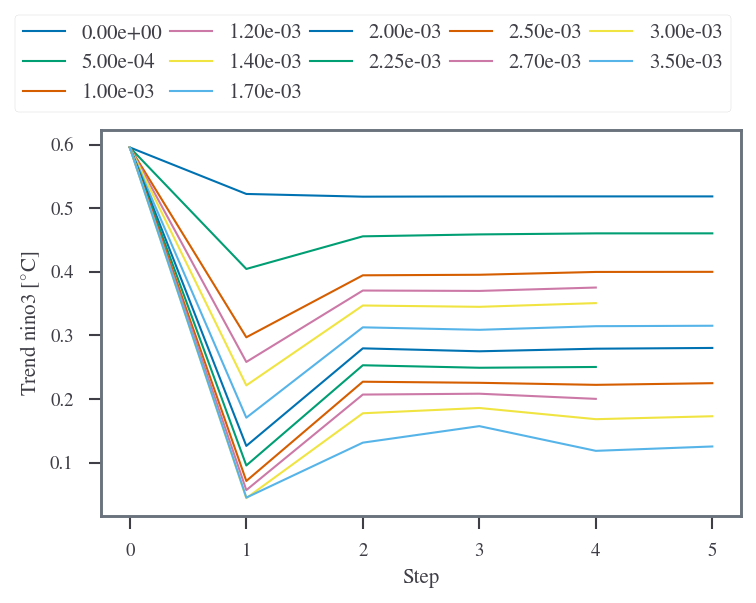

In [72]:
metric_conv_plot(metric_name="trend_nino3", long_name="Trend nino3")

<Run sdat2/seager19/28w09p06 (finished)>
<Run sdat2/seager19/3187qitr (failed)>
<Run sdat2/seager19/2ts6f2rp (failed)>
<Run sdat2/seager19/vf5mt15q (finished)>
<Run sdat2/seager19/suszf2cj (finished)>
<Run sdat2/seager19/3jcljvx5 (finished)>
<Run sdat2/seager19/176yerzi (finished)>
<Run sdat2/seager19/184vohdn (finished)>
<Run sdat2/seager19/1levxkju (finished)>
<Run sdat2/seager19/3a4idlie (finished)>
<Run sdat2/seager19/1vre85tn (finished)>
<Run sdat2/seager19/3ke8yisi (finished)>
<Run sdat2/seager19/2um7xc7h (finished)>


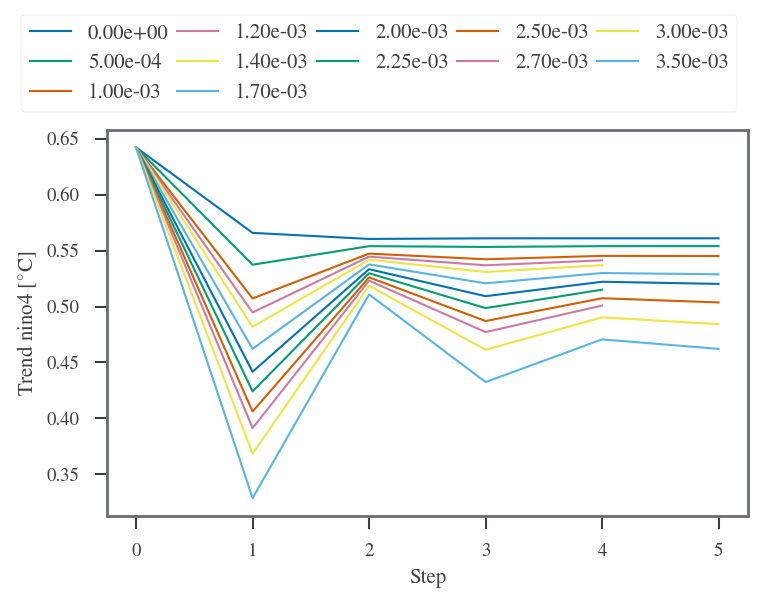

In [74]:
metric_conv_plot(metric_name="trend_nino4", long_name="Trend nino4")